## Chicago Crime is not Alone by Alex Wieker

## Introduction
In recent years, social media has assigned a narrative to Chicago in which it is the boogeyman of criminal activity (boogeyman narrative), and it is often considered in a playing field of its own when it comes to said criminal activity. However, contrary to this narrative, data suggests that crime has actually been on a downward trend for more than a few years. Hence, in this article I go through two datasets, Crimes - 2001 to present dataset (Chicago dataset) and Crime Data from 2010 to Present (Los Angeles) to measure the veracity of the boogeyman narrative and to determine whether there are outlying factors which might have contributed to its existence. In addition, to demonstrating that Chicago crime is not as severe as the social media would have us believe, I also use the data to argue that Chicago is not alone. That is, there are other metropolitian cities that are equally facing the same issues when it comes to crime as Chicago.

In [1]:
import pandas as pd
import numpy as np
import bqplot
import ipywidgets
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# read in aggregate csv file by crime type done by the groupby size method
crime_type_size_df = pd.read_csv("crime_type_size_df.csv").drop(columns='Unnamed: 0')
crime_type_size_df.head()

,Primary Type,size
0,THEFT,1439000
1,BATTERY,1247989
2,CRIMINAL DAMAGE,779869
3,NARCOTICS,715960
4,ASSAULT,425066


In [3]:
# read in aggregate csv file by crime type and year done by the groupby size method
crime_type_year_df = pd.read_csv("crime_type_year_df.csv").drop(columns='Unnamed: 0')
crime_type_year_df.head()

,Primary Type,Year,size
0,THEFT,2001,99264
1,THEFT,2003,98875
2,THEFT,2002,98327
3,THEFT,2004,95463
4,BATTERY,2002,94153


In [4]:

# create plot one x and y values
x = crime_type_size_df['Primary Type']
y = crime_type_size_df['size']

# initiate plot one scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()


bar = bqplot.Bars(x=x, y = y/1000, # set y-values to per thousand, so values are more clear.
                scales={'x': x_sc, 'y': y_sc}, 
                interactions={'click':'select'},
                selected_style={'fill': 'orange'})

ax_x = bqplot.Axis(scale=x_sc, 
                   tick_style= {'font-size': '10px'}, # set font-size to ten for increased legibility
                   tick_rotate = -700,  # rotate x-axis values
                   offset={'scale': x_sc, 'value': '50'}, # offset x-axis values
                   label= 'Type of Crime')  # set x-axis label

ax_y = bqplot.Axis(scale=y_sc,
                   orientation='vertical', 
                   label='Total Crimes Reported per Thousand Crimes', # set y-axis label
                   label_offset='-50') # y-axis label offset

# initiate a label above the plot
mySelectedLabel = ipywidgets.Label()

# initiate plot year label range
year_range = bqplot.Label(x=[0.75],y=[0.10], font_size=52, font_weight='bolder', 
                         colors=['blue'], 
                          text=[('Year Range: 2001 to 2019')], 
                          x_offset = -125,
                          y_offset = -300)

fig = bqplot.Figure(marks=[bar, year_range], axes=[ax_x, ax_y], padding_x=0.025, padding_y=0.025,
                    title="Ten Most Common Reported Chicagoan Crimes")

# initiate plot two scales
x_sc2 = bqplot.LinearScale()
y_sc2 = bqplot.LinearScale()


x_ax2 = bqplot.Axis(scale=x_sc2, label='Year', # set x-axis label
                    tick_values=crime_type_year_df['Year'], # set tick values
                    offset={'scale': x_sc, 'value': '200'}, # offset x-values (scale has to be x_sc to work)
                    tick_rotate = 400) # rotate x-values
 
y_ax2 = bqplot.Axis(scale=y_sc2, 
                    label='Total Crimes Reported', # set label
                    orientation = 'vertical', 
                    label_offset='-50')  # set label off set

# initiate the start plot two subset--the get_tot_crimes_types function will change subset by clicking
mask = 'THEFT'

# create a mask that updates plot two based upon selection. The default mask value is theft as the starting point. 
# Instructor Naiman helped me set up the mask. 
x_mask = crime_type_year_df['Year']
x_mask = x_mask[crime_type_year_df['Primary Type'] == mask]

# create a mask similar to x_mask except for the y values
y_mask = crime_type_year_df['size']
y_mask = y_mask[crime_type_year_df['Primary Type'] == mask]

line_plot = bqplot.marks.Lines(x=sorted(x_mask), y = y_mask,marker='circle', stroke_width=1, scales={'x':x_sc2,'y':y_sc2})

fig2 = bqplot.Figure(marks=[line_plot], axes=[x_ax2,y_ax2], 
                     title="Total Crimes by Crime Type and Year")

# create change function that subsets first plot by click
def get_tot_crime_types(change):
    mask = x[change['owner'].selected[0]]

    x_mask = crime_type_year_df['Year']
    x_mask = sorted(x_mask[crime_type_year_df['Primary Type'] == mask])

    y_mask = crime_type_year_df['size']
    y_mask = y_mask[crime_type_year_df['Primary Type'] == mask]
    
    crime_string = str(mask)
    
    # make label lowercase
    crime_string = crime_string.lower()
    
    # capitalize first letter 
    crime_string = crime_string.capitalize()

    mySelectedLabel.value =  crime_string + ' ' +  'crimes reported:' \
    + ' '+ str(sum(y_mask))
                                            
    line_plot.x = x_mask
    line_plot.y = y_mask

bar.observe(get_tot_crime_types, 'selected')

ipywidgets.VBox([mySelectedLabel,ipywidgets.HBox([fig, fig2])])

## Part 1
Terminology:

Deceptive Practice: This crime has a very wide field of coverage, but a simple definition is that this crime is commited when one attempts to defraud another person. 

This first visualization is an interactive dashboard. If you click on a crime type bar, output will display how many reported incidents of that type have occurred from 2001 to 2019 in Chicago, and on the right hand side the line plot will also update where it will output how many reported incidents there were for that crime per year. By looking at the ten most reported common crime types in Chicago, it is plain to see that crime has been dropping since about 2010 for all of the crime types and as soon as the early 2000's for some. Additionally, if you look at the types of crimes in the top ten most common crimes, only a few of them are violent crimes, battery and assault, and a great many of them qualify as misdemeanors. Lastly, the crimes that are often discussed the most in the media, such as homicide, do not even make this list, which is actually the 21th most common crime in Chicago. Hence, the boogeyman narrative should be questioned not only because crime has been trending downward for a few years but also because violent crimes are not nearly as plentiful as the narrative suggests.

In [5]:
# read in aggregate crime type arrest % csv file 
arrest_perc_df = pd.read_csv("arrest_perc_df.csv").drop(columns='Unnamed: 0')
arrest_perc_df.head()

,Primary Type,Arrest Made %
0,PROSTITUTION,0.996105
1,NARCOTICS,0.994111
2,PUBLIC INDECENCY,0.993902
3,GAMBLING,0.992795
4,LIQUOR LAW VIO,0.991148


In [6]:
x2 = arrest_perc_df['Primary Type']
y2 = arrest_perc_df['Arrest Made %']

x_sc3 = bqplot.OrdinalScale()
y_sc3 = bqplot.LinearScale()


bar2 = bqplot.Bars(x=x2, y = y2, # set y-values to per thousand, so values are more clear.
                scales={'x': x_sc3, 'y': y_sc3}, 
                interactions={'click':'select'},
                selected_style={'fill': 'orange'})

ax_x3 = bqplot.Axis(scale=x_sc3, 
                   tick_style= {'font-size': '8px'}, # set font-size to seven for increased legibility
                   tick_rotate = -700,  # rotate x-axis values
                   offset={'scale': x_sc3, 'value': '50'}, # offset x-axis values
                   label= 'Type of Crime')  # set x-axis label

ax_y3 = bqplot.Axis(scale=y_sc3,
                   orientation='vertical', 
                   label='Arrest Percentage', # set y-axis label
                   label_offset='-50') # y-axis label offset

# initiate a label above the plot
mySelectedLabel2 = ipywidgets.Label()

# initiate plot year label range
year_range2 = bqplot.Label(x=[0.75],y=[0.10], font_size=52, font_weight='bolder', 
                         colors=['blue'], 
                          text=[('Year Range: 2001 to 2019')], 
                          x_offset = -125,
                          y_offset = -300)
    
fig3 = bqplot.Figure(marks=[bar2, year_range2], axes=[ax_x3, ax_y3],
                    title="Chicagoan Reported Crimes by Arrest Percentage")
def get_crime_arrest_perc(change2):
    x_values = x2[change2['owner'].selected[0]]
    
    y_values = y2[change2['owner'].selected[0]]
    y_values = y_values.round(3)
    y_values = str(y_values * 100)
  
    mySelectedLabel2.value =  str(x_values.lower().capitalize()) + ' ' + \
    'reported crimes arrest percentage: ' + y_values + '%'
                            
fig3.layout.width = '900px'

bar2.observe(get_crime_arrest_perc, 'selected')
ipywidgets.VBox([mySelectedLabel2,ipywidgets.HBox([fig3])])

## Part 2
Terminology:

Deceptive Practice: This crime has a very wide field of coverage, but a simple definition is that this crime is commited when one attempts to defraud another person.

Also, take note that VIO stands in place of violation.

While the above dashboard demonstrated that reported Chicago crime has been trending downward for quite a few years now, this visualization might glean why Chicago has a bad reputation for its violent crime and crime frequency. In this visualization, you can click on any of the bars, and it will output the crime type and the arrest percentage for that given subset of reported crimes. Additionally, some crimes have nearly a 100% arrest ratio, such as prostitution, whereas other crimes, such as burglary, have about 10% arrest percentage. By examining what kind of crimes make up these opposing spectrums, it is interesting to note that four of the worst arrest rate crime types come from the top ten most common crimes, and one might chalk that up to crime frequency. However, narcotics, which is the fourth most common Chicagoan crime, is the crime with the second best arrest percentage, so it is unlikely that there is a correlation bretween crime type frequency and arrest percentage. Furthermore, many of the crimes that have the worst arrest percentages are misdemeanors, which is logical because they won't be as high of priorities as other crimes. Lastly, back to the topic on hand, which is to explain why this boogeyman narrative is being pushed by the media. Very noticibly the middling arrest percentage crimes are the omnipresent crimes in this narrative. Despite the downward trend in total crime in recent years and even though violent crimes do not make up a large percentage of Chicago crime, since these middling arrest percentage crimes are violent crimes and often go unpunished, they are contributing to this misleading Chicagoan boogeyman narrative.

In [7]:
"""I had trouble reading in the series from a csv, and I used code from the following web page:
https://stackoverflow.com/questions/42597368/when-i-read-in-a-pandas-series-from-csv-it-is-turning-it-into-a-dataframe
"""

# read in aggregate csv file by year done by the groupby size method 
la_crime_type_size_df = pd.read_csv("la_crime_type_size_df.csv", header=None, squeeze=True, index_col=0)  
la_crime_type_size_df.head()


0
2010    208787
2011    200407
2012    201124
2013    192163
2014    194956
Name: 1, dtype: int64

In [8]:
"""I had trouble reading in the series from a csv, and I used code from the following web page: 
https://stackoverflow.com/questions/42597368/when-i-read-in-a-pandas-series-from-csv-it-is-turning-it-into-a-dataframe
"""
# read in aggregate csv file by year done by the groupby size method 
crimes_2010_2018_df = pd.read_csv("crimes_2010_2018_df.csv", header=None, squeeze=True, index_col=0)  

crimes_2010_2018_df.head()

0
2010    370313
2011    351777
2012    335970
2013    307100
2014    275289
Name: 1, dtype: int64

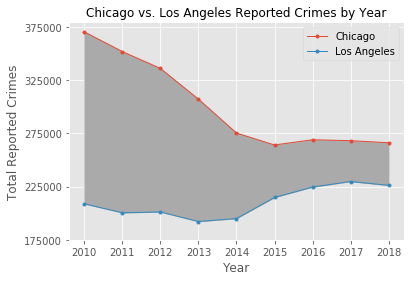

In [9]:
with plt.style.context("ggplot"):
    plt.plot(crimes_2010_2018_df, marker='.', linewidth = 1.0, label="Chicago")
    plt.plot(la_crime_type_size_df, marker='.', linewidth = 1.0, label="Los Angeles")
    
    plt.fill_between(la_crime_type_size_df.index, crimes_2010_2018_df, la_crime_type_size_df, color = "#aaaaaa")

    plt.title("Chicago vs. Los Angeles Reported Crimes by Year", fontsize=12)
    
    x_index = np.arange(2010, 2019)
    y_index = np.arange(175000, 400000, 50000)
    plt.xticks(x_index)
    plt.yticks(y_index)
    plt.xlabel("Year")
    plt.ylabel("Total Reported Crimes")
    
    plt.legend()


## Conclusion
Thus far I have demonstrated that Chicago crime has been trending downward in recent years and it is the poor arrest percent violent crimes that give Chicago a bad reputation as a violent city, which I have used to argue that this boogeyman narrative is misleading. In drawing a comparison of total chicago crime by year to another large metropolitian city, such as Los Angeles, I can clearly demonstrate that overall Chicago crime has been trending downward, which was hinted at in the dashboard visualization. Within an eight year time span there has been a decrease of about 100,000 crimes per year. However, I should point out that Chicago crime declination has  stagnated since 2015, even though the top ten most common crimes continue to decline in frequency. Nevertheless, criminal activity in Chicago is not nearly as severe as the boogeyman narrative suggests. Furthermore, the inclusion of Los Angeles in the last visualization, which is city of slightly larger magnitude in population, demonstrates that Chicago is not the only large metropolitan city in the United States faced with significant levels of crime. In contrast to the boogeyman narrative, one could argue that Los Angeles is faced with a worse criminal activity situation because it is trending upwards since 2014 whereas Chicago has declined in recent years. The intention of these visualizations is not to say that Chicagoan crime is not a serious issue, it is. However, these visualizations illustrate that the Chicago boogeyman narrative is misleading not only because Chicago crime has been trending downwards for years but also because it is not the only city that is troubled by criminal activity.

## Future Work
While I have demonstrated that Chicagoan crime is neither as plentiful as would be believed nor is it the only metropolitian city in the United States that faces challenges when it comes to crime, I do believe that there is an element of this data that deserves more attention. There is one contradiction between my first and third visualization's because my first visualization demonstrates that the top ten most common Chicagoan crimes are continuing to have a downward trend in frequency whereas my latest visualization suggests that the crime downward trend has stagnated. Hence, I believe it would be worthwhile to explore why this is happening. One way of going about this would be to determine what crimes in Chicago if any have been growing since 2015, which might give some insight into how the continaul decline of the ten most common Chicagoan crimes types have been equalized by the rest of the crime types since 2015.

## Bibliography

Police. Crimes - 2001 to present. April 17, 2001. Distributed by Chicago Data Portal. https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2. 

LAPD. Crime Data from 2010 to Present. April 10, 2017. Distributed by Los Angeles Open Data. https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq. 


